# Tìm kiếm trong không gian trạng thái

In [1]:
from PIL import Image
from IPython.display import display
image1 = Image.open("dothi1.png"); image2 = Image.open("dothi2.png");  # Đọc tập tin ảnh của đồ thị cần xử lý

## Bài 1. Biễu diễn đồ thị
Cho đồ thị hàm số **G** (**V**, **E**) như bên dưới:

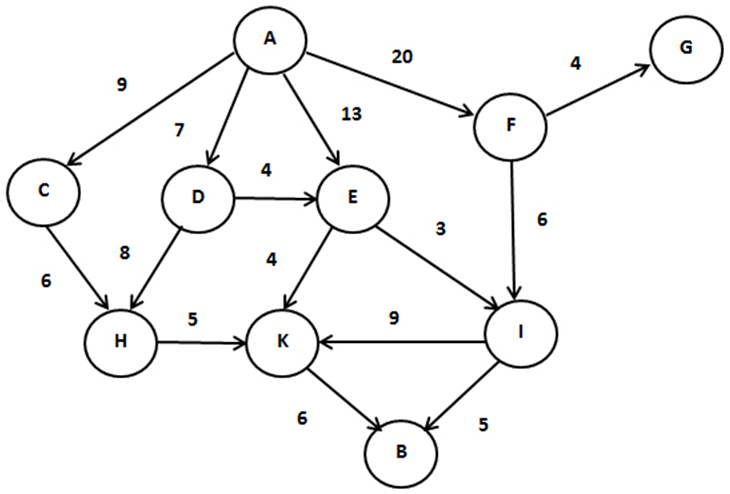

In [2]:
display(image1); # Hiển thị ảnh của đồ thị cần xử lý

### 1. Biễu diễn bằng danh sách kề có trọng số

In [3]:
COST = {}                                          # từ điển chứ các đỉnh trong đồ thị
COST["A"] = {"C": 9, "D": 7, "E": 13, "F": 20}     # tại khóa "A": chứa từ điển chứa cặp (k,v) với k là đỉnh kề, v là trọng số từ A --> k
""" CÁC BẠN LÀM BÀI Ở ĐÂY """
# ...

In [4]:
import pprint
print(f'{pprint.pformat(COST)}')

{'A': {'C': 9, 'D': 7, 'E': 13, 'F': 20},
 'B': {},
 'C': {'H': 6},
 'D': {'E': 4, 'H': 8},
 'E': {'I': 3, 'K': 4},
 'F': {'G': 4, 'I': 6},
 'G': {},
 'H': {'K': 5},
 'I': {'B': 5, 'K': 9},
 'K': {'B': 6}}


### 2. Thao tác duyệt đồ thị

#### (a) Liệt kê các đỉnh

In [5]:
print("Các đỉnh của đồ thị: ", end = " ")
""" CÁC BẠN LÀM BÀI Ở ĐÂY """
# ...

Các đỉnh của đồ thị:  A B C D E F G H I K 


#### (b) Liệt kê các cung
Hiển thị đồ thị dưới dạng danh sách kề có trọng số

In [6]:
def HienThiDoThi(G):
    """
    Hiển thị đồ thị G
    """
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    # ...
    
    pass

In [7]:
print("Danh sách cung của đồ thị: ")
HienThiDoThi(COST)

Danh sách cung của đồ thị: 
+ Đỉnh A: A->C=(9), A->D=(7), A->E=(13), A->F=(20), 
+ Đỉnh B: 
+ Đỉnh C: C->H=(6), 
+ Đỉnh D: D->E=(4), D->H=(8), 
+ Đỉnh E: E->I=(3), E->K=(4), 
+ Đỉnh F: F->G=(4), F->I=(6), 
+ Đỉnh G: 
+ Đỉnh H: H->K=(5), 
+ Đỉnh I: I->B=(5), I->K=(9), 
+ Đỉnh K: K->B=(6), 


#### (c) Kiểm tra kề và trọng số giữa 2 cung
Cho hai đỉnh A, B. Hỏi hai đỉnh A, B có kề nhau không? Nếu có, chi phí đi từ A tới B là bao nhiêu?

In [8]:
def LaKe(G, a, b):
    """
    Kiểm tra đỉnh a, b có kề nhau trong đồ thị G?
    Input: 
    + Đồ thị G
    + Cung (a, b)
    Return: (la_ke, trong_so)
    + (None, None): Đỉnh a, b không tồn tại
    + (0, None)   : Đỉnh a, b không kề nhau
    + (1, w): Đỉnh a, b kề nhau với w là trọng số của đồ thị G
    """
    result = None
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    # ...
    
    return result

In [9]:
a = "L"; b = "R"; print(f"{a} ke {b}: {LaKe(COST, a, b)}")
a = "A"; b = "R"; print(f"{a} ke {b}: {LaKe(COST, a, b)}")
a = "E"; b = "D"; print(f"{a} ke {b}: {LaKe(COST, a, b)}")
a = "D"; b = "E"; print(f"{a} ke {b}: {LaKe(COST, a, b)}")

L ke R: (None, None)
A ke R: (None, None)
E ke D: (0, None)
D ke E: (1, 4)


#### (d) Tìm danh sách kề của một đỉnh
Cho một đỉnh A. Hỏi danh sách các đỉnh kề với A

In [10]:
def LayKe(G, a):
    """
    Tìm danh sách đỉnh kề với a trong đồ thị G
    Input: 
    + Đồ thị G và đỉnh A
    Return: danh sách kề 
    + None: a khong ton tai
    + []  : a khong ke voi bat ky dinh nao: 
    + [a1, a2, ...]: Danh sách đỉnh kề với a: 
    """
    result = None
    
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    # ...
    
    return result

In [11]:
a = "P"; print(f"Danh sach ke voi dinh {a}: {LayKe(COST, a)}")
a = "A"; print(f"Danh sach ke voi dinh {a}: {LayKe(COST, a)}")
a = "B"; print(f"Danh sach ke voi dinh {a}: {LayKe(COST, a)}")
a = "D"; print(f"Danh sach ke voi dinh {a}: {LayKe(COST, a)}")

Danh sach ke voi dinh P: None
Danh sach ke voi dinh A: ['C', 'D', 'E', 'F']
Danh sach ke voi dinh B: []
Danh sach ke voi dinh D: ['E', 'H']


## Bài 2. Thuật toán Best-First Search

Thuật toán Best-First Search tìm đường đi ngắn nhất
```
OPEN: tập các trạng thái đã được sinh ra nhưng chưa được xét đến.
CLOSED: tập các trạng thái đã được xét đến.
COST(p, q): là khoảng cách giữa p, q.
g(p): khoảng cách từ trạng thái đầu đến trạng thái hiện tại p.
path(p): trạng thái trước đó để đi tới trạng thái p

Bước 1:
    Open    = {s}
    Close   = {}
Bước 2: while (Open !={})
    + Chọn trạng thái (đỉnh) tốt nhất p theo g(p) trong OPEN (xóa p khỏi OPEN).
    + Chuyển p qua CLOSED
    + Xét các đỉnh q kề với p:
        * Nếu q chưa có trong OPEN và CLOSED:
            - g(q) = g(p) + cost(p, q)
            - path(q) = p
            - Thêm q vào OPEN
        * Nếu q đã có trong OPEN và g(q) > g(p) + cost(p, q):
            - g(q) = g(p) + cost(p, q)
            - path(q) = p
        * Nếu q có trong CLOSED: không làm gì cả
Bước 3: Truy hồi trạng thái đích. 
```

### 1. Cài đặt thao tác trên tập Open

+ **Heap** là cấu trúc dữ liệu để biểu diễn hàng đợi ưu tiên để lấy giá trị nhỏ nhất (**MinHeap**), hay lớn nhất (**MaxHeap**) trong mảng 1 cách nhanh nhất.
+ Tập **OPEN** là chứa các giá trị đỉnh mà cần lấy đỉnh tốt nhất với gmin sao cho nhanh nhất. Do đó, ta tổ chức OPEN dưới dạng **HeapMin**.
+ Mỗi item trong **HeapMin** gồm 2 thông tin **(g, p)** với g là trọng số và p là đỉnh của đồ thị **G**.
+ Các thao tác trên Heap: 
    + **pusp(item)**: thêm 1 phần tử vào heap
    + **pop()**     : lấy phần tử nhỏ nhất ra khỏi heap
    + **top()**     : lấy giá trị phần tử nhỏ nhất của heap
    + **empty()**   : kiểm tra heap rỗng

In [12]:
import heapq # Thư viện Python hỗ trợ push, pop, pushpop để xây dựng heap trên 1 mảng
# Xây dựng MinHeap
class MinHeap(object):
    def __init__(self):                         # Khởi tạo MinHeap rỗng
        self.items = []
        pass
    
    def empty(self):                            # Kiểm tra heap rỗng
        return len(self.items)==0
  
    def push(self, item):                       # Đưa một item vào MinHeap
        heapq.heappush(self.items, item)
        pass
  
    def pop(self):                              # Lấy 1 item có giá trị nhỏ nhất ra khỏi MinHeap
        item = heapq.heappop(self.items)
        return item
    
    def check(self, item):                      # Kiểm tra item có nằm trong MinHeap
        return item in self.items
    
    def update(self, item, new_item):           # Cập nhật lại new_item từ item cho trước
        for i in range(len(self.items)):
            if self.items[i] == item:
                self.items[i] = new_item
                heapq.heapify(self.items)
        pass
  
    pass # MinHeap

In [13]:
items = [(10, "F"), (6, "B"), (8, "K"), (21, "A"), (9, "H")]

# Thêm danh sách items gồm (g = giá trị ngắn nhất từ start --> p, p --> thông tin đỉnh p) vào OPEN
OPEN = MinHeap()
print("Thứ tự thêm vào: ")
for item in items: 
    OPEN.push(item)
    print(item, end = " ")
print()

OPEN.update((8, 'K'), (1, 'K'))

print("Thứ tự lấy ra: ")
while OPEN.empty() == False:
    print(OPEN.pop(), end = " ")

Thứ tự thêm vào: 
(10, 'F') (6, 'B') (8, 'K') (21, 'A') (9, 'H') 
Thứ tự lấy ra: 
(1, 'K') (6, 'B') (9, 'H') (10, 'F') (21, 'A') 

### 2. Cài đặt thuật toán

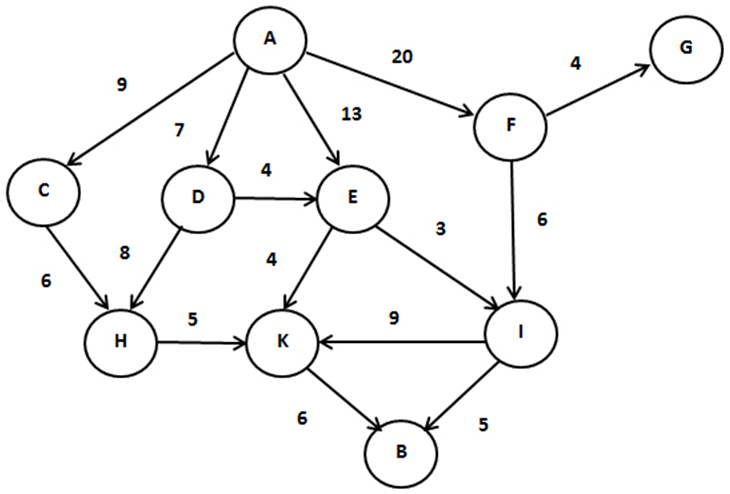

In [14]:
display(image1)

In [15]:
def BestFirstSearch(G, start, goal):
    """
    Tìm đường đi ngắn nhất từ đỉnh start đến goal trong đồ thị G
    Input:
    + Đồ thị G biểu diễn dưới dạng danh sách kề trọng số
    + Đỉnh xuất phát start và tìm kiểm goal
    Return: (path, g) 
    + path[q]: mảng chứa các đỉnh phía trước để đi tới q
    + g[q]: mảng chứa đường đi ngắn nhất từ start đến q
    + (None, None) --> đỉnh start, goal không hợp lệ
    Lưu ý: 
    + Do OPEN là MinHeap nên ta tổ chức dạng (trọng số, đỉnh) để sắp xếp tăng dần trọng số, cũng như lấy được đỉnh
      * Khi đó, thao tác lấy 1 đỉnh với trọng số nhỏ nhất là (trọng số, đỉnh) = OPEN.pop()
      * Ngược lại kiểm tra 1 đỉnh có nằm trong OPEN thì có 2 cách:
        (1) Cách trực tiếp: dùng hàm check với (g(đỉnh), đỉnh) để kiểm tra
        (2) Cách gián tiếp: g.get(đỉnh) is not None ==> đã thấy (trong OPEN hay CLOSED) và đỉnh not in CLOSED
    """
    result = (None, None)
    
    if G.get(start) is None or G.get(goal) is None:
        result = (None, None)
    else:
        path     = {}     # path(q) = p nghĩa là đỉnh p là đỉnh trước của q, nếu là None nghĩa là ko có đỉnh trước
        g        = {}     # g(q) = d nghĩa là khoảng cách ngắn nhất từ start --> q là d
        OPEN     = MinHeap()
        CLOSED   = []
        
        OPEN.push((0, start))               # đưa đỉnh start vào OPEN (0 là chi phí của start)
        path[start] = None                  # trước start không có đỉnh nào
        g[start]    = 0                     # chi phí là 0
        while OPEN.empty() == False:
            """ CÁC BẠN LÀM BÀI Ở ĐÂY """
            # ...
            
            pass # while
        result = (path, g)
        pass # if 
    return result
    pass # BestFirstSearch

In [16]:
path, g = BestFirstSearch(COST, 'A', 'B')
print(f'Mảng tối ưu:\n{pprint.pformat(g)}\n')
print(f'Mảng truy hồi đường:\n{pprint.pformat(path)}\n')

Mảng tối ưu:
{'A': 0,
 'B': 19,
 'C': 9,
 'D': 7,
 'E': 11,
 'F': 20,
 'G': 24,
 'H': 15,
 'I': 14,
 'K': 15}

Mảng truy hồi đường:
{'A': None,
 'B': 'I',
 'C': 'A',
 'D': 'A',
 'E': 'D',
 'F': 'A',
 'G': 'F',
 'H': 'D',
 'I': 'E',
 'K': 'E'}



## Bài 3. Thuật toán A*

```
OPEN: tập các trạng thái đã được sinh ra nhưng chưa được xét đến.
CLOSED: tập các trạng thái đã được xét đến.
COST(p, q): là khoảng cách giữa p, q.
g(p): khoảng cách từ trạng thái đầu đến trạng thái hiện tại p.
h(p): giá trị được lượng giá từ trạng thái hiện tại đến trạng thái đích.
f(p) = g(p) + h(p)
path(p): trạng thái trước đó để đi tới trạng thái p

Bước 1:
    Open    = {s}
    Close   = {}
Bước 2: while (Open !={})
    + Chọn trạng thái (đỉnh) tốt nhất p theo g(p) trong OPEN (xóa p khỏi OPEN).
    + Chuyển p qua CLOSED
    + Xét các đỉnh q kề với p:
        * Nếu q chưa có trong OPEN:
            - g(q) = g(p) + cost(p, q)
            - f(q) = g(q) + h(q)
            - path(q) = p
            - Thêm q vào OPEN
        * Nếu q đã có trong OPEN và g(q) > g(p) + cost(p, q):
            - g(q) = g(p) + cost(p, q)
            - f(q) = g(q) + h(q)
            - path(q) = p
        * Nếu q có trong CLOSED và g(q) > g(p) + cost(p, q):
            - g(q) = g(p) + cost(p, q)
            - f(q) = g(q) + h(q)
            - path(q) = p
            - Di chuyển q vào CLOSED
Bước 3: Truy hồi trạng thái đích. 
```

### 1. Biểu diễn tri thức h(p)

Thuật toán **A*** tìm đường đi ngắn nhất khi cho tri thức **h(goal)**

Nghĩa là, tại một đỉnh p đang xét, ta cần cân nhắc:
+ Chi phí tối ưu hiện tại từ start --> đỉnh đang xét **g(p)**
+ Ước lượng tương lai từ đỉnh đang xét --> đỉnh muốn đến **h(p)**

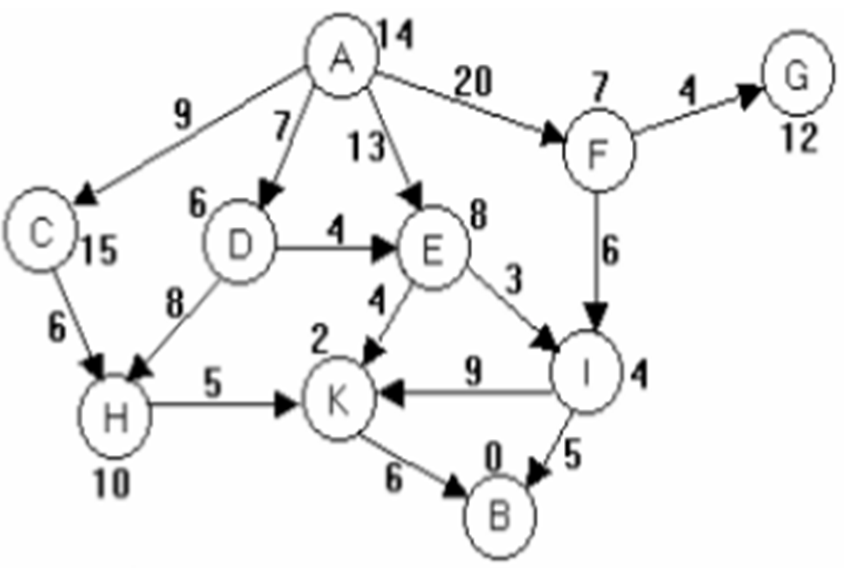

In [17]:
display(image2)

In [18]:
# Biễu diễn tri thức h(p) ước lượng chi phí từ p --> đỉnh "B" 
# Ước lượng cho thuật toán khả thi là phải luôn nhỏ hơn đường đi ngắn nhất thực tế từ p --> đỉnh "B"
h = {}                   # từ điển chứ các đỉnh trong đồ thị với giá trị là biểu diễn tri thức
h["A"] = 14              # chi phí ước lượng từ A --> B là 14
""" CÁC BẠN LÀM BÀI Ở ĐÂY """
# ...


In [19]:
print(f'{pprint.pformat(h)}')

{'A': 14,
 'B': 0,
 'C': 15,
 'D': 6,
 'E': 8,
 'F': 7,
 'G': 12,
 'H': 10,
 'I': 4,
 'K': 2}


### 2. Cài đặt thuật toán

In [20]:
def AStartSearch(G, start, goal, h = {}):
    """
    Tìm đường đi ngắn nhất từ đỉnh start đến goal trong đồ thị G với tri thức h(p)
    Input:
    + Đồ thị G biểu diễn dưới dạng danh sách kề trọng số
    + Đỉnh xuất phát start và tìm kiểm goal
    + Tri thức h(p) nghĩa là ước lượng chi phí đi từ đỉnh p --> goal
    Return: (path, g) 
    + path[q]: mảng chứa các đỉnh phía trước để đi tới q
    + g[q]: mảng chứa đường đi ngắn nhất từ start đến q
    + (None, None) --> đỉnh start, goal không hợp lệ
    Lưu ý: 
    + Do OPEN là MinHeap nên ta tổ chức dạng (trọng số, đỉnh) để sắp xếp tăng dần trọng số, cũng như lấy được đỉnh
      * Khi đó, thao tác lấy 1 đỉnh với trọng số nhỏ nhất là (trọng số, đỉnh) = OPEN.pop()
      * Ngược lại kiểm tra 1 đỉnh có nằm trong OPEN thì có 2 cách:
        (1) Cách trực tiếp: dùng hàm check với (g(đỉnh), đỉnh) để kiểm tra
        (2) Cách gián tiếp: g.get(đỉnh) is not None ==> đã thấy (trong OPEN hay CLOSED) và đỉnh not in CLOSED
    """
    result = (None, None)
    
    if G.get(start) is None or G.get(goal) is None:
        result = (None, None)
    else:
        path     = {}     # path(q) = p nghĩa là đỉnh p là đỉnh trước của q, nếu là None nghĩa là ko có đỉnh trước
        g        = {}     # g(q) = d nghĩa là khoảng cách ngắn nhất từ start --> q là d
        f        = {}     # f(p) = g(p) + h(p), h(p) = None ==> h(p) = 0 (không có tri thức từ p --> goal)
        OPEN     = MinHeap()
        CLOSED   = []
        
        path[start] = None                        # trước start không có đỉnh nào
        g[start]    = 0                           # chi phí là 0
        f[start]    = g[start] + h.get(start, 0)  # nếu 1 đỉnh ko có trong h --> tri thức chưa có --> h = 0
        OPEN.push((f[start], start))              # đưa đỉnh start vào OPEN với chi phí f(start)
        while OPEN.empty() == False:
            (_, p) = OPEN.pop()                   # lấy đỉnh p ra khỏi OPEN với f(p) min
            CLOSED.append(p)                      # đưa p vào CLOSED
            """ CÁC BẠN LÀM BÀI Ở ĐÂY """
            # ...
            
            pass # while
        result = (path, g)
        pass # if 
    return result
    pass # AStartSearch

In [21]:
path, g = AStartSearch(COST, 'A', 'B')
print(f'Mảng tối ưu:\n{pprint.pformat(g)}\n')
print(f'Mảng truy hồi đường:\n{pprint.pformat(path)}\n')

Mảng tối ưu:
{'A': 0,
 'B': 19,
 'C': 9,
 'D': 7,
 'E': 11,
 'F': 20,
 'G': 24,
 'H': 15,
 'I': 14,
 'K': 15}

Mảng truy hồi đường:
{'A': None,
 'B': 'I',
 'C': 'A',
 'D': 'A',
 'E': 'D',
 'F': 'A',
 'G': 'F',
 'H': 'D',
 'I': 'E',
 'K': 'E'}



### 3. Truy hồi đường đi

In [22]:
def find_path(path, start, goal):
    """
    Cho mang truy hoi duong, tim ds dinh tu start --> goal
    """
    result = []
    
    """ CÁC BẠN LÀM BÀI Ở ĐÂY """
    # ...
    
    return result
    pass

In [23]:
find_path(path, 'A', 'B')

['A', 'D', 'E', 'I', 'B']

# Kết thúc